# Nombres:
Lopez Rodriguez Jesus Inocencio --
Alaluna Godinez Mauricio Antonio

# Comentarios sobre el modelo
El modelo SVM aunque la gráfica no diga mucho debido a que los datos no son tan dispersos, en cuanto a la predicción ha sido el más acertado para identificar si el cáncer es recurrente posterior al tratamiento, sin embargo para predicir los casos negativos, solo tiene una precisión del 64%, además que nos resulta extraño el que la precisión sea del 100%, es posible que haya un error o la aproximación sea de un 99.9%.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

dataframe = pd.read_csv("BreastCancerDataSet_LimpiezaCompletada.csv",sep=';')
dataframe.head(10)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,2,3,7,1,2,3,1,2,2
1,0,3,3,5,1,2,2,2,3,2
2,0,3,3,5,1,2,2,1,2,2
3,0,5,2,4,1,2,2,2,1,2
4,0,3,3,1,1,2,2,2,4,2
5,0,5,2,4,1,2,2,1,2,2
6,0,4,3,6,1,2,2,1,2,2
7,0,5,2,5,1,2,1,1,2,2
8,0,3,3,11,1,2,2,1,2,2
9,0,3,3,5,1,2,2,2,1,2


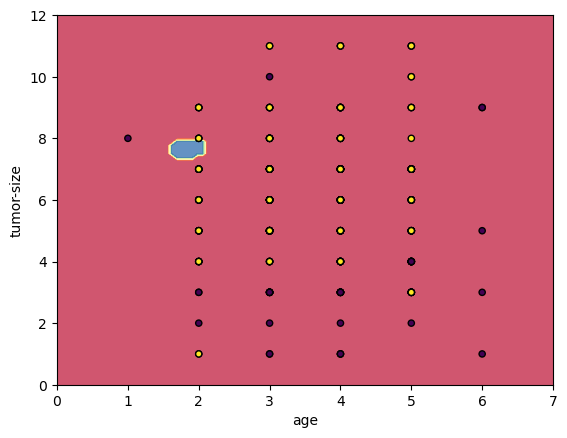

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

X = dataframe[["age", "tumor-size"]].values
y = dataframe["Class"].values

# Entrenar el modelo SVM
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X, y)

# Mostrar la frontera de decisión
DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel="age",
    ylabel="tumor-size",
)

# Gráfico de dispersión
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")
plt.show()


In [11]:
from sklearn.metrics import classification_report, confusion_matrix 

print(dataframe.keys()) 


Index(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')


In [13]:
# Separar las variables predictoras
df_feat = dataframe.drop(columns=["Class"])

# Separar la variable objetivo
df_target = dataframe["Class"]

# Mostrar la información de las variables
print("Feature Variables:") 
print(df_feat.info())


Feature Variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          277 non-null    int64
 1   menopause    277 non-null    int64
 2   tumor-size   277 non-null    int64
 3   inv-nodes    277 non-null    int64
 4   node-caps    277 non-null    int64
 5   deg-malig    277 non-null    int64
 6   breast       277 non-null    int64
 7   breast-quad  277 non-null    int64
 8   irradiat     277 non-null    int64
dtypes: int64(9)
memory usage: 19.6 KB
None


In [15]:
print("Dataframe looks like : ") 
print(df_feat.head()) 

Dataframe looks like : 
   age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0    2          3           7          1          2          3       1   
1    3          3           5          1          2          2       2   
2    3          3           5          1          2          2       1   
3    5          2           4          1          2          2       2   
4    3          3           1          1          2          2       2   

   breast-quad  irradiat  
0            2         2  
1            3         2  
2            2         2  
3            1         2  
4            4         2  


In [17]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split( 
                        df_feat, np.ravel(df_target), 
                test_size = 0.30, random_state = 101) 

In [19]:
model = SVC() 
model.fit(X_train, y_train) 
  
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        53
           1       1.00      0.03      0.06        31

    accuracy                           0.64        84
   macro avg       0.82      0.52      0.42        84
weighted avg       0.77      0.64      0.51        84



In [29]:
print(model.predict([[2,3,6,1,2,3,1,1,2]]))

[0]


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#Corregimos la advertencia
print(knn_mm.predict(pd.DataFrame([[2,3,6,1,2,3,1,1,2]], columns=x.columns)))
print(knn_mm.predict_proba(pd.DataFrame([[2,3,6,1,2,3,1,1,2]], columns=x.columns)))